## Final Project Submission

Please fill out:
* Student name: Evan Okin
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Eli Thomas
* Blog post URL: TBD

<font color='blue'>This is Evan Okin's project for FlatIron Data Bootcamp's Module 1. I explore a data-set which includes variables that could be potential predictors of house prices. My approach is to load in the data, explore the data, clean the data, and analyze relationships between predictors and house prices. The goal is to use a multiple linear regression which will contain several variables that might contribute to house prices. I will iterate several versions of regression in order to remove variables that turn out to be faulty or don't provide significant value for our model - the dataset has many potential variables to explore. After my final iteration, the model output will hopefully be intuitive enough to provide an understanding for how we can utilize this information to our advantage in a business or personal portfolio context. </font>

<font color='green'>Import the data.</font>

In [1]:
import pandas as pd
df=pd.read_csv('kc_house_data.csv')

<font color='green'>Display the first several rows of the data to make sure that it loaded in properly.</font>

In [2]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


<font color='green'>There are many variables that might influence the variable "price" of a house. For example, intuitively, the number of bedrooms should have a positive relationship with home values, which we will check later.</font>

<font color='green'>Analyze the dataset using built-in pandas and numpy methods.</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
import numpy as np
np.shape(df)

(21597, 21)

<font color='green'>The dataset has over 21,000 rows and 21 columns...a lot to work with!</font>

<font color='green'>Let's set the index to be equal to the id values (since there will be no predictive value in them as independent variables)</font>

In [5]:
df.set_index('id',inplace=True)
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [6]:
df.hist(bins=20,figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123420550>,
      dtype=object)

<font color='green'>Let's explore the "date" column.</font>

In [7]:
df['date'].describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

<font color='green'>It is likely that we won't be using dates to predict home value. Let's drop the variable.</font>

In [8]:
df=df.drop('date',axis=1)

<font color='green'>Let's explore the dataset to see if there are missing values.</font>

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
for element in df.columns:
    if df[element].isna().sum()>0:
        print(element)

waterfront
view
yr_renovated


In [11]:
total = df.isna().sum().sort_values(ascending=False)
percent_blank = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing = pd.concat([total,percent_blank],axis=1, keys=['Total Null','Percent Null'])
missing

,Total Null,Percent Null
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
sqft_lot15,0,0.000000
condition,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000


In [12]:
round((df['waterfront'].isna().sum())/df['waterfront'].count(),3)

0.124

<font color='green'>12.4% of the "waterfront" data is missing, which we will address soon.</font>

In [13]:
round((df['view'].isna().sum())/df['view'].count(),3)

0.003

<font color='green'>0.3% of the "view" data is missing, which we will address soon.</font>

In [14]:
round((df['yr_renovated'].isna().sum())/df['yr_renovated'].count(),3)

0.216

<font color='green'>21.6% of the "yr_renovated" data is missing, which we will address soon.</font>

<font color='green'>Let's take care of the missing values in the "waterfront" column.</font>

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Waterfront Histogram')

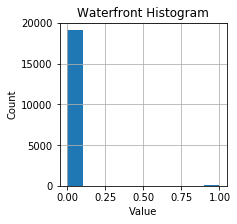

In [16]:
df['waterfront'].hist(figsize=(3,3))
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Waterfront Histogram')

<font color='green'>The overwhelming majority of values are 0, i.e., indicative that the property is not waterfront. Let's replace all blank values with 0, the mode.</font>

In [17]:
df['waterfront'].fillna(0,inplace=True)

In [18]:
df['waterfront'].isna().sum()

0

<font color='green'>Let's take care of the missing values in the "view" column.</font>

Text(0.5, 1.0, 'View Histogram')

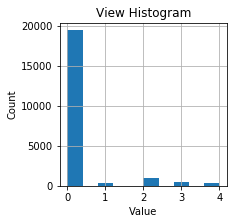

In [19]:
df['view'].hist(figsize=(3,3))
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('View Histogram')

<font color='green'>Once again, the overwhelming majority of values are 0. Let's replace all blank values with 0, the mode.</font>

In [20]:
df['view'].fillna(0,inplace=True)

In [21]:
df['view'].isna().sum()

0

<font color='green'>Let's take care of the missing values in the "yr_renovated" column.</font>

In [22]:
df['yr_renovated'].isna().sum()

3842

In [23]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

Text(0.5, 1.0, 'Yr_Renovated Histogram')

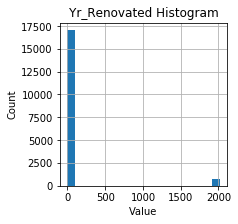

In [24]:
df['yr_renovated'].hist(figsize=(3,3),bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Yr_Renovated Histogram')

In [25]:
df.yr_renovated.value_counts().head(8)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
Name: yr_renovated, dtype: int64

<font color='green'>The majority of homes have not been renovated, so let's replace missing values with 0.</font>

In [26]:
df['yr_renovated'].fillna(0,inplace=True)

<font color='green'>Let's see if there are any null values, or if we took care of them all.</font>

In [27]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<font color='green'>Great, no missing values.</font>

<font color='green'>We can now analyze the other columns further.</font>

<font color='green'>Let's look at "bedrooms".</font>

In [28]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [29]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<font color='green'>We can see that there's actually a house with 33(!) bedrooms. Let's look to see if there are a lot of houses with double-digit number of bedrooms.</font>

In [30]:
df.loc[df['bedrooms']>9]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
1773100755,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
627300145,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
5566100170,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8812401450,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [31]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<font color='green'>The house with 33 bedrooms looks like an outlier that was likely mistyped. We could either set it equal to the next max bedrooms, we could assume that it was a typo and was intended to be a "3", or we can just drop the row entirely. All methods have their merits. Let's replace it with a "3". </font>

In [32]:
df['bedrooms'].replace(33,3,inplace=True)

<font color='green'>Confirm that the max is now 11.</font>

In [33]:
df['bedrooms'].max()

11

<font color='green'>Let's analyze the "bathrooms" column.</font>

In [34]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

<font color='green'>While half bathrooms exist, it is strange that we are seeing quarter and three-quarter bathrooms. Let's fix that by rounding to the nearest half bathroom. </font>

In [35]:
df['bathrooms']=df['bathrooms'].map(lambda x: round(x*2)/2)

In [36]:
df['bathrooms'].value_counts()

2.0    7025
2.5    5377
1.0    3931
3.0    2527
1.5    1445
3.5     731
4.0     370
4.5     100
5.0      57
6.0      12
5.5      10
0.5       4
8.0       3
6.5       2
7.0       2
7.5       1
Name: bathrooms, dtype: int64

<font color='green'>Let's drop "latitude" and "longitude" as these will be difficult to use for predictions.</font>

In [37]:
df=df.drop('lat',axis=1)
df=df.drop('long',axis=1)

<font color='green'>Let's explore "zipcode".</font>

In [38]:
df.zipcode.value_counts().nunique()

65

In [39]:
df.zipcode.count()/df.zipcode.value_counts().nunique()

332.26153846153846

<font color='green'>Our model might get too clunky if we use 65 zipcodes. Note, however, that there is an average of 332 values per zipcode, which should be sufficient for helpful predictions, if we want to use all of these variables. For now, we will drop this variable, but we might come back to it later.</font>

In [40]:
df=df.drop('zipcode',axis=1)

<font color='green'>Let's explore "floors".</font>

In [41]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

<font color='green'>This looks completely normal. We can view this in a pie chart as well.</font>

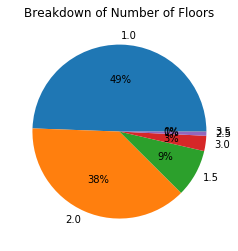

In [42]:
import seaborn as sns
labels=df['floors'].value_counts().index
sizes=df['floors'].value_counts().values
plt.figure(figsize=(4,4))
plt.pie(sizes,labels=labels,autopct='%1.0f%%')
plt.title('Breakdown of Number of Floors')
plt.show()

<font color='green'>It's slightly cluttered, but we can easily see that the majority of homes have either 1 or 2 floors.</font>

<font color='green'>Let's explore "condition".</font>

In [43]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

<font color='green'>This looks completely normal.</font>

<font color='green'>Let's explore "grade".</font>

In [44]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

<font color='green'>Let's explore "yr_built".</font>

In [45]:
df['yr_built'].value_counts().nunique()

99

<font color='green'>There are 99 different values for year built. In reality, there might be very little difference between a building built in 1954 and 1955. Let's simplify this by creating an indicator column for whether the variable is a "pre-war" or "post-war" building. </font>

In [46]:
df['post_war_indicator']=np.where(df['yr_built']>1939,1,0)

In [47]:
df=df.drop('yr_built',axis=1)

<font color='green'>Let's explore "yr_renovated".</font>

In [48]:
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

<font color='green'>There are 70 different values for year renovated. In reality, there might be very little difference between a building renovated in 2000 and 2001. Let's simplify this by creating an indicator column for whether the variable is recently renovated. This is a little bit subjective, let's say anything renovated in 2000 or later is "recently renovated".</font>

In [49]:
df['renovated_indicator']=np.where(df['yr_renovated']>1999,1,0)

In [50]:
df=df.drop('yr_renovated',axis=1)

<font color='green'>Let's look at square footage columns.</font>

Text(0.5, 1.0, 'Sqft_Living Histogram')

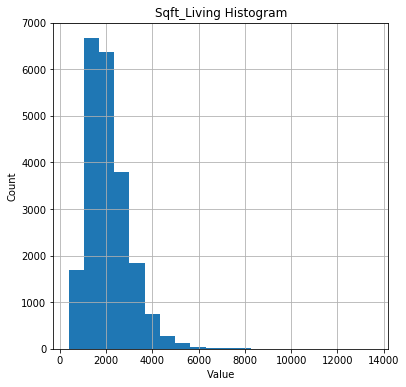

In [51]:
df['sqft_living'].hist(figsize=(6,6),bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sqft_Living Histogram')

Text(0.5, 1.0, 'Sqft_Lot Histogram')

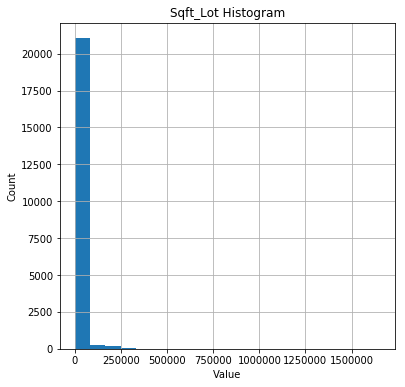

In [52]:
df['sqft_lot'].hist(figsize=(6,6),bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Sqft_Lot Histogram')

In [53]:
df_sqft=df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]

In [54]:
df_sqft.head(3)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
id,,,,,,
7129300520,1180,5650,1180,0.0,1340,5650
6414100192,2570,7242,2170,400.0,1690,7639
5631500400,770,10000,770,0.0,2720,8062


<font color='green'>It looks as though sqft_living = sqft_above + sqft_basement. Let's confirm this, and if so we'll remove sqft_living (because the information is fully captured in the other variables, and to avoid multicollinearity).</font>

In [55]:
df_sqft['sqft_basement'].value_counts().head(3)

0.0      12826
?          454
600.0      217
Name: sqft_basement, dtype: int64

In [56]:
df['sqft_basement']=df['sqft_living']-df['sqft_above']

<font color='green'>Confirm that there are no more ?'s on "sqft_basement".</font>

In [57]:
df.loc[df['sqft_basement']=='?']

/Users/evanokin/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,post_war_indicator,renovated_indicator
id,,,,,,,,,,,,,,,,


In [58]:
df=df.drop('sqft_living',axis=1)

<font color='green'>The variable "sqft_lot15" is the square footage of the land lots of the nearest 15 neighbors. This is likely highly correlated with the "sqft_lot" variable. Let's verify and if so, delete the column for the land lots of the nearest 15 neighbors.</font>

In [59]:
print('The correlation coefficient between the variables "sqft_lot" and "sqft_lot15" is '
      + str(round(np.corrcoef(df['sqft_lot'],df['sqft_lot15'])[0,1],2))+'%')
if np.corrcoef(df['sqft_lot'],df['sqft_lot15'])[0,1]>0.50:
    df=df.drop('sqft_lot15',axis=1)

The correlation coefficient between the variables "sqft_lot" and "sqft_lot15" is 0.72%


In [60]:
df.corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,post_war_indicator,renovated_indicator
price,1.000000,0.315954,0.516635,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.323799,0.585241,-0.070532,0.106004
bedrooms,0.315954,1.000000,0.529812,0.033606,0.183721,-0.002053,0.080747,0.023390,0.366181,0.492549,0.309244,0.404540,0.103072,0.033967
bathrooms,0.516635,0.529812,1.000000,0.088745,0.463986,0.064885,0.188103,-0.110984,0.648023,0.671168,0.295020,0.561429,0.213763,0.064886
sqft_lot,0.089876,0.033606,0.088745,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015418,0.144763,0.051213,-0.013414
floors,0.256804,0.183721,0.463986,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.245715,0.280102,0.071448,0.004076
waterfront,0.264306,-0.002053,0.064885,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.082800,0.083823,-0.020045,0.014795
view,0.393497,0.080747,0.188103,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.273845,0.278928,-0.040090,0.039026
condition,0.036056,0.023390,-0.110984,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.173849,-0.093072,-0.179568,-0.072814
grade,0.667951,0.366181,0.648023,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.168220,0.713867,0.204366,0.035664
sqft_above,0.605368,0.492549,0.671168,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,-0.052156,0.731767,0.173736,0.015921


Text(0.5, 1.0, 'Correlation Heatmap')

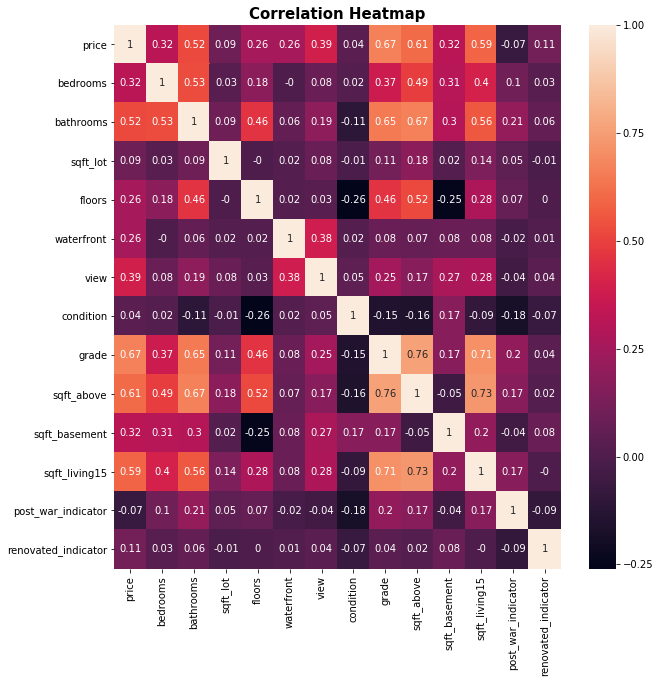

In [61]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(round(corr,2),annot=True)
corr.style.background_gradient(cmap='coolwarm')
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)

<font color='green'>We can also see that the variable "sqft_living15" is likely highly correlated with the "sqft_above" variable, and delete it.</font>

In [62]:
df.drop('sqft_living15',axis=1,inplace=True)

<font color='green'>This is our "first draft" cleaned up dataframe. We will have to do some work to make our variables more suited for regression (such as turning categorical variables into dummy variables), but we've dealt with missing values, removed outliers, and got rid of unnecessary columns. </font>

<font color='green'>We can save our dataframe to a csv file. </font>

In [63]:
df.to_csv('Cleaned_Data_KMC_Housing.csv')

<font color='green'>Let's visualize "grade" against "price".</font>

Text(0.5, 1.0, 'Scatter of Grade vs. Price')

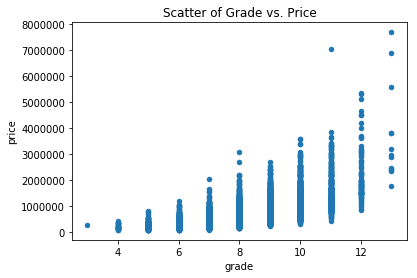

In [64]:
df.plot.scatter('grade','price')
plt.title('Scatter of Grade vs. Price')

<font color='green'>Let's observe 99th percentile of values to make sure that there doesn't seem to be anything crazy going on.</font>

In [65]:
df.quantile(q=.99)

price                  1970000.0
bedrooms                     6.0
bathrooms                    4.0
sqft_lot                213008.0
floors                       3.0
waterfront                   0.0
view                         4.0
condition                    5.0
grade                       11.0
sqft_above                4370.0
sqft_basement             1660.0
post_war_indicator           1.0
renovated_indicator          1.0
Name: 0.99, dtype: float64

<font color='green'>Luckily, nothing jumps out as unreasonable.</font>

<font color='green'>Let's use grouping to analyze mean price by various variables.</font>

In [66]:
grouping_df=df.groupby(['grade','floors'],as_index=False)['price'].mean()
grouping_df

,grade,floors,price
0,3,1.0,2.620000e+05
1,4,1.0,2.137620e+05
2,4,1.5,1.900000e+05
3,5,1.0,2.444255e+05
4,5,1.5,2.703643e+05
5,5,2.0,2.475000e+05
6,6,1.0,2.944102e+05
7,6,1.5,3.415126e+05
8,6,2.0,3.025907e+05
9,6,2.5,3.612500e+05


<font color='green'>Generally, home prices increase for higher combinations of grades and floors.</font>

In [67]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'post_war_indicator',
 'renovated_indicator']

<font color='green'>Let's run an initial regression on this dataset.</font>

In [68]:
independent_vbles=list(df.columns)
independent_vbles.remove('price')
independent_vbles

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'post_war_indicator',
 'renovated_indicator']

In [69]:
from statsmodels.formula.api import ols
dependent_vble = 'price'
#independent_vbles list already defined above
predictors = '+'.join(independent_vbles)
formula = dependent_vble + "~" + predictors
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3158.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:30:01   Log-Likelihood:            -2.9644e+05
No. Observations:               21597   AIC:                         5.929e+05
Df Residuals:                   21584   BIC:                         5.930e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.854e+05   1

<font color='green'>Let's clean up the variables further, because as it currently stands, our model is unintuitive. For instance, the number of bedrooms and floors are negatively correlated with house prices in our multiple regression model. For our next iteration, we will scale/normalize our variables, create dummy variables for categorical variables, and deal with potential multicollinearity further. </font>

<font color='green'>Let's analyze our variables to see which are categorical and need to be made into dummy variables. </font>

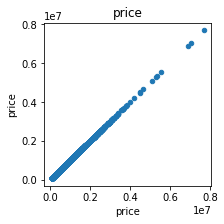

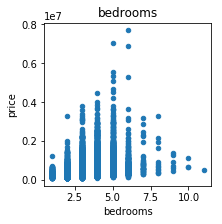

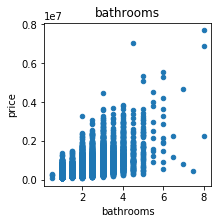

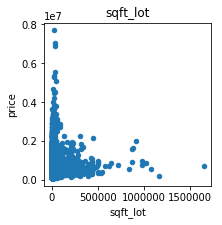

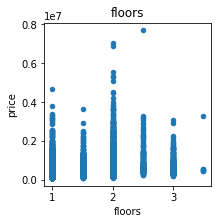

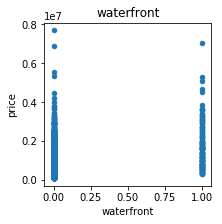

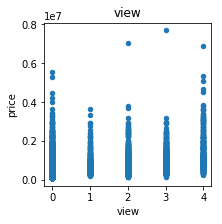

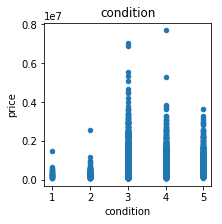

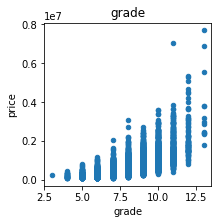

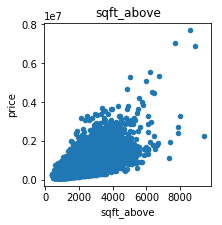

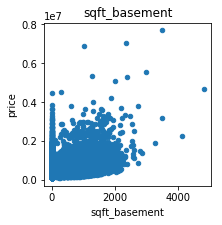

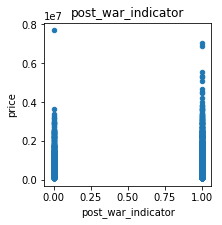

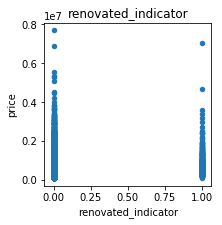

In [70]:
for element in df.columns:
    df.plot.scatter(element,'price',figsize=(3,3))
    plt.title(element)

<font color='green'>As we can see, "bedrooms," "bathrooms," "floors," "waterfront," "view," "condition," and "grade" are categorical and need to be addressed.</font>

In [71]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'post_war_indicator', 'renovated_indicator'],
      dtype='object')

In [72]:
bed_dummies = pd.get_dummies(df['bedrooms'],prefix='bed')
bath_dummies = pd.get_dummies(df['bathrooms'],prefix='bath')
floors_dummies = pd.get_dummies(df['floors'],prefix='floors')
water_dummies = pd.get_dummies(df['waterfront'],prefix='water')
view_dummies = pd.get_dummies(df['view'],prefix='view')
cond_dummies = pd.get_dummies(df['condition'],prefix='cond')
grade_dummies = pd.get_dummies(df['grade'],prefix='grade')
df = pd.concat([df,bed_dummies,bath_dummies,floors_dummies,water_dummies,view_dummies,
               cond_dummies,grade_dummies],axis=1)
df.drop(['bedrooms','bathrooms','floors','waterfront','view','condition','grade'],axis=1,inplace=True)
df.drop(['bed_1','bath_0.5','floors_1.0','view_0.0','cond_1','grade_3'],axis=1,inplace=True) 
#drop to avoid multicollinearity
df.head(2)

,price,sqft_lot,sqft_above,sqft_basement,post_war_indicator,renovated_indicator,bed_2,bed_3,bed_4,bed_5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,5650,1180,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6414100192,538000.0,7242,2170,400,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [73]:
df.columns

Index(['price', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'post_war_indicator', 'renovated_indicator', 'bed_2', 'bed_3', 'bed_4',
       'bed_5', 'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11',
       'bath_1.0', 'bath_1.5', 'bath_2.0', 'bath_2.5', 'bath_3.0', 'bath_3.5',
       'bath_4.0', 'bath_4.5', 'bath_5.0', 'bath_5.5', 'bath_6.0', 'bath_6.5',
       'bath_7.0', 'bath_7.5', 'bath_8.0', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5', 'water_0.0', 'water_1.0',
       'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'cond_2', 'cond_3',
       'cond_4', 'cond_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [74]:
np.shape(df)

(21597, 56)

<font color='green'>Creating dummy variables has resulted in 56 columns for our regression. With this more granular segmentation, it should be easier to interpret the results.</font>

<font color='green'>Let's perform standard normalization feature scaling so that the non-categorical variables are on the same scale.  </font>

In [75]:
sqftlot= df['sqft_lot']
df_scaled = pd.DataFrame([])
df_scaled['sqft_lot'] = (sqftlot-np.mean(sqftlot))/np.sqrt(np.var(sqftlot))
df['sqft_lot'] = df_scaled['sqft_lot']
df['sqft_lot'].describe()

count    2.159700e+04
mean    -5.461668e-17
std      1.000023e+00
min     -3.520603e-01
25%     -2.429124e-01
50%     -1.806594e-01
75%     -1.065982e-01
max      3.951203e+01
Name: sqft_lot, dtype: float64

In [76]:
sqftabove= df['sqft_above']
df_scaled['sqft_above'] = (sqftabove-np.mean(sqftabove))/np.sqrt(np.var(sqftabove))
df['sqft_above'] = df_scaled['sqft_above']
df['sqft_above'].describe()

count    2.159700e+04
mean     1.042932e-16
std      1.000023e+00
min     -1.713818e+00
25%     -7.231696e-01
50%     -2.761697e-01
75%      5.091005e-01
max      9.207478e+00
Name: sqft_above, dtype: float64

In [77]:
#Perform min-max scaling instead of standard normalization, to show both types
sqftbasement= df['sqft_basement']
df_scaled['sqft_basement'] = (sqftbasement-min(sqftbasement))/(max(sqftbasement)-min(sqftbasement))
df['sqft_basement'] = df_scaled['sqft_basement']
df['sqft_basement'].describe()

count    21597.000000
mean         0.060524
std          0.091840
min          0.000000
25%          0.000000
50%          0.000000
75%          0.116183
max          1.000000
Name: sqft_basement, dtype: float64

<font color='green'>The regression model (via statsmodels) is sensitive to _'s and .'s for column variables, so we'll take care of the column formatting.</font>

In [78]:
df.columns = [i.replace("_","") for i in df.columns]
df.columns = [i.replace(".","p") for i in df.columns]

In [79]:
df.columns

Index(['price', 'sqftlot', 'sqftabove', 'sqftbasement', 'postwarindicator',
       'renovatedindicator', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7',
       'bed8', 'bed9', 'bed10', 'bed11', 'bath1p0', 'bath1p5', 'bath2p0',
       'bath2p5', 'bath3p0', 'bath3p5', 'bath4p0', 'bath4p5', 'bath5p0',
       'bath5p5', 'bath6p0', 'bath6p5', 'bath7p0', 'bath7p5', 'bath8p0',
       'floors1p5', 'floors2p0', 'floors2p5', 'floors3p0', 'floors3p5',
       'water0p0', 'water1p0', 'view1p0', 'view2p0', 'view3p0', 'view4p0',
       'cond2', 'cond3', 'cond4', 'cond5', 'grade4', 'grade5', 'grade6',
       'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12',
       'grade13'],
      dtype='object')

In [80]:
independent_vbles=list(df.columns)
independent_vbles.remove('price')
independent_vbles
dependent_vble = 'price'
#independent_vbles list defined above
predictors = '+'.join(independent_vbles)
formula = dependent_vble + "~" + predictors
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     870.4
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:30:06   Log-Likelihood:            -2.9489e+05
No. Observations:               21597   AIC:                         5.899e+05
Df Residuals:                   21542   BIC:                         5.903e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.233e+17   3.84

<font color='green'>Let's find the regression's R-squared.</font>

In [81]:
model.rsquared

0.6857094656491819

<font color='green'>We might be able to do better, but the R-squared is a healthy 69%.</font>

<font color='green'>Let's find the p-values to see which variables are statistically significant.</font>

In [82]:
model.pvalues

Intercept              7.479867e-01
sqftlot                5.872844e-16
sqftabove             2.126216e-282
sqftbasement          5.273981e-278
postwarindicator      1.926487e-187
renovatedindicator     9.554275e-50
bed2                   1.779836e-01
bed3                   4.602458e-01
bed4                   5.636721e-02
bed5                   1.160046e-01
bed6                   1.111016e-03
bed7                   2.318172e-06
bed8                   1.383589e-01
bed9                   2.216981e-01
bed10                  2.674541e-01
bed11                  4.087397e-01
bath1p0                4.828857e-01
bath1p5                5.573862e-01
bath2p0                5.917374e-01
bath2p5                8.554710e-01
bath3p0                5.327161e-01
bath3p5                5.259105e-01
bath4p0                6.154246e-02
bath4p5                8.482182e-02
bath5p0                1.003723e-04
bath5p5                3.034515e-06
bath6p0                1.339421e-09
bath6p5                7.200

In [83]:
#for i in model.pvalues:
#    if i>.05:
#        print(i)
#p-values are very high for the "bathroom" variables, so we'll remove them

<font color='green'>p-Values are very high for the "bathroom" variables, so we'll remove them from our model.</font>

In [84]:
df.drop(['bath1p0', 'bath1p5', 'bath2p0',
       'bath2p5', 'bath3p0', 'bath3p5', 'bath4p0', 'bath4p5', 'bath5p0',
       'bath5p5', 'bath6p0', 'bath6p5', 'bath7p0', 'bath7p5', 'bath8p0'],axis=1,inplace=True)
df.columns

Index(['price', 'sqftlot', 'sqftabove', 'sqftbasement', 'postwarindicator',
       'renovatedindicator', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7',
       'bed8', 'bed9', 'bed10', 'bed11', 'floors1p5', 'floors2p0', 'floors2p5',
       'floors3p0', 'floors3p5', 'water0p0', 'water1p0', 'view1p0', 'view2p0',
       'view3p0', 'view4p0', 'cond2', 'cond3', 'cond4', 'cond5', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'grade13'],
      dtype='object')

In [85]:
df.drop('sqftlot',axis=1,inplace=True)
independent_vbles=list(df.columns)
independent_vbles.remove('price')
independent_vbles
dependent_vble = 'price'
#independent_vbles list defined above
predictors = '+'.join(independent_vbles)
formula = dependent_vble + "~" + predictors
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:30:06   Log-Likelihood:            -2.9529e+05
No. Observations:               21597   AIC:                         5.907e+05
Df Residuals:                   21558   BIC:                         5.910e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -8.694e+16   3.91

<font color='green'>p-Values are very high for the "bedroom", "grade", "condition" variables, so we'll remove them from our model.</font>

In [86]:
df.drop(['bed2','bed3','bed4','bed5','bed6','bed7','bed8','bed9','bed10','bed11','cond2','cond3',
        'cond4','cond5','grade4','grade5','grade6','grade7','grade8','grade9','grade10','grade11',
        'grade12','grade13'],axis=1,inplace=True)

In [87]:
independent_vbles=list(df.columns)
independent_vbles.remove('price')
independent_vbles
dependent_vble = 'price'
#independent_vbles list defined above
predictors = '+'.join(independent_vbles)
formula = dependent_vble + "~" + predictors
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2179.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:30:07   Log-Likelihood:            -2.9788e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21582   BIC:                         5.959e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.742e+05   8795

<font color='green'>All p-Values look good, and our model looks statistically significant.</font>

<font color='green'>The R-squared of our final model:</font>

In [88]:
model.rsquared

0.5857133200033635

<font color='green'>The coefficients of our final model:</font>

In [89]:
model.params

Intercept             5.742269e+05
sqftabove             2.330390e+05
sqftbasement          1.149532e+06
postwarindicator     -1.665136e+05
renovatedindicator    1.450246e+05
floors1p5            -3.102999e+04
floors2p0            -3.355163e+04
floors2p5             1.414253e+05
floors3p0             1.230331e+05
floors3p5             2.637061e+05
water0p0              2.606782e+04
water1p0              5.481591e+05
view1p0               1.649432e+05
view2p0               1.085525e+05
view3p0               1.830341e+05
view4p0               3.877935e+05
dtype: float64

<font color='green'> Our final model to predict house prices is:
    
    House Price = 574,226.9 + 
                  233,039.0 * sqftabove + 
                  1,149,532.0 * sqftbasement + 
                  -166,513.6 * postwarindicator + 
                  145,024.6 * renovatedindicator + 
                  -31,029.99 * floors1.5 + 
                  -33,551.63 * floors2.0 + 
                  141,425.3 * floors2.5 + 
                  123,033.1 * floors3.0 + 
                  263,706.1 * floors3.5 + 
                  26,067.82 * waterfront0.0 + 
                  548,159.1 * waterfront1.0 + 
                  164,943.2 * view1.0 + 
                  108,552.5 * view2.0 + 
                  183,034.1 * view3.0 + 
                  387,793.5 * view4.0 
</font>

<font color='green'>If you want to predict house prices, just plug the variables into the above equation. While there are other variables that you might intuitively think to include, they've been removed due to statistical insignificance or due to being highly correlated with these variables. </font>

<font color='green'>Let's understand several coefficients and their impact on the house price. </font>

<font color='green'>Variable 1: renovatedindicator </font>

<font color='blue'>The model coefficient is 145,024.6. Any home that was renovated in 2000 or later is expected to have a higher price by $145,024.6. Any home that was renovated before 2000 or was not renovated does not get a price boost.</font>

<font color='green'>Variable 2: floors3.0 </font>

<font color='blue'>This is one of the dummy variables that we created. The model coefficient is 123,033.1. Any home that has 3 floors expected to have a higher price by $123,033.1. Any home that does not have 3 floors does not get this price boost (they will get a different amount/boost instead).</font>

<font color='green'>Variable 3: sqftabove </font>

<font color='blue'>This is one of the variables that we performed standard normalization feature scaling on. The model coefficient is 223,039.0. 
    
Any home that has square footage (not including basement area) that is one standard deviation above the average home is expected to have a higher price by $223,039.0. 

Conversely, any home that has square footage (not including basement area) that is one standard deviation below the average home is expected to have a lower price by $223,039.0. </font>